In [3]:
### Mutation analysis ###

# observedMutations function calualte the basic mutational load. 
# Mutations can be calculated as counts or frequencies and divided into replacement (R) or 
# silent (S) mutations, and subset into FWR and CDR specific mutations. 


# Import required packages
library(alakazam)
library(shazam)
library(dplyr)
library(ggplot2)

require(data.table)
my_data <- as.data.frame(fread("../../changeo10x/vac_heavy_germ-pass.tsv"))

In [4]:
# Import required packages
library(alakazam)
library(shazam)
library(dplyr)
library(ggplot2)

# Load and subset example data
data(ExampleDb, package="alakazam")
db <- subset(my_data, c_call %in% c("IGHA", "IGHM", "IGHG", "IGHD"))

In [5]:
# Calculate R and S mutation counts
db_obs <- observedMutations(db, sequenceColumn="sequence_alignment",
                            germlineColumn="germline_alignment_d_mask",
                            regionDefinition=NULL,
                            frequency=FALSE, 
                            nproc=1)
# Show new mutation count columns
db_obs %>% 
    select(sequence_id, starts_with("mu_count_")) %>%
    head(n=10)

,sequence_id,mu_count_seq_r,mu_count_seq_s
,<chr>,<dbl>,<dbl>
1,ACGATACTCAACGCTA-1_contig_2,0,0
2,TGGCCAGTCTCTTATG-1_contig_1,0,0
3,ATAAGAGCAAGAAAGG-1_contig_2,0,0
4,TTCTACAAGAATTCCC-1_contig_1,0,0
5,AGCGTATAGAAACCGC-1_contig_1,0,0
6,TTATGCTTCAATAAGG-1_contig_2,0,0
7,TGACGGCGTGAGGCTA-1_contig_2,0,1
8,CGGAGTCCACTGTCGG-1_contig_2,0,0
9,TCTGGAACAGTGGGAT-1_contig_2,0,0


In [6]:
# Calculate R and S mutation frequencies
db_obs <- observedMutations(db_obs, sequenceColumn="sequence_alignment",
                            germlineColumn="germline_alignment_d_mask",
                            regionDefinition=NULL,
                            frequency=TRUE, 
                            nproc=1)
# Show new mutation frequency columns
db_obs %>% 
    select(sequence_id, starts_with("mu_freq_")) %>%
    head(n=10)

,sequence_id,mu_freq_seq_r,mu_freq_seq_s
,<chr>,<dbl>,<dbl>
1,ACGATACTCAACGCTA-1_contig_2,0,0.000000000
2,TGGCCAGTCTCTTATG-1_contig_1,0,0.000000000
3,ATAAGAGCAAGAAAGG-1_contig_2,0,0.000000000
4,TTCTACAAGAATTCCC-1_contig_1,0,0.000000000
5,AGCGTATAGAAACCGC-1_contig_1,0,0.000000000
6,TTATGCTTCAATAAGG-1_contig_2,0,0.000000000
7,TGACGGCGTGAGGCTA-1_contig_2,0,0.002915452
8,CGGAGTCCACTGTCGG-1_contig_2,0,0.000000000
9,TCTGGAACAGTGGGAT-1_contig_2,0,0.000000000


In [7]:
# Calculate combined R and S mutation frequencies
db_obs <- observedMutations(db, sequenceColumn="sequence_alignment",
                            germlineColumn="germline_alignment_d_mask",
                            regionDefinition=NULL,
                            frequency=TRUE, 
                            combine=TRUE,
                            nproc=1)
# Show new mutation frequency columns
db_obs %>% 
    select(sequence_id, starts_with("mu_freq_")) %>%
    head(n=4)

,sequence_id
,<chr>
1,ACGATACTCAACGCTA-1_contig_2
2,TGGCCAGTCTCTTATG-1_contig_1
3,ATAAGAGCAAGAAAGG-1_contig_2
4,TTCTACAAGAATTCCC-1_contig_1


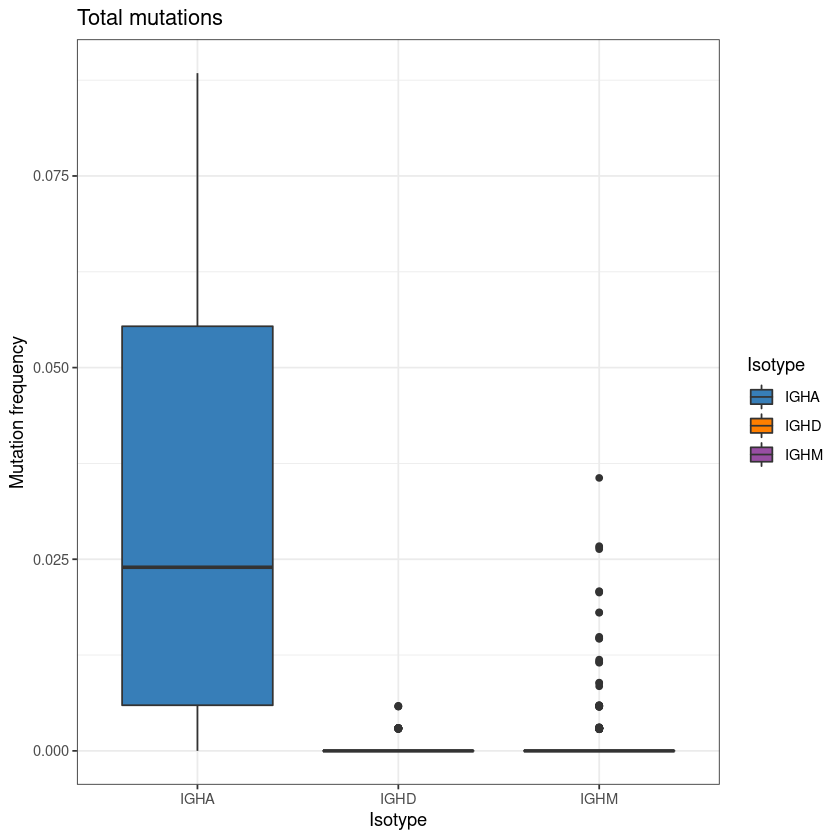

In [8]:
g1 <- ggplot(db_obs, aes(x=c_call, y=mu_freq, fill=c_call)) +
    theme_bw() + ggtitle("Total mutations") +
    xlab("Isotype") + ylab("Mutation frequency") +
    scale_fill_manual(name="Isotype", values=IG_COLORS) +
    geom_boxplot()
plot(g1)

In [9]:
# Calculate R and S mutation counts for individual CDRs and FWRs
db_obs_v <- observedMutations(db, sequenceColumn="sequence_alignment",
                              germlineColumn="germline_alignment_d_mask",
                              regionDefinition=IMGT_V_BY_REGIONS,
                              frequency=FALSE, 
                              nproc=1)
# Show new FWR mutation columns
db_obs_v %>% 
    select(sequence_id, starts_with("mu_count_fwr")) %>%
    head(n=4)

,sequence_id,mu_count_fwr1_r,mu_count_fwr1_s,mu_count_fwr2_r,mu_count_fwr2_s,mu_count_fwr3_r,mu_count_fwr3_s
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ACGATACTCAACGCTA-1_contig_2,0,0,0,0,0,0
2,TGGCCAGTCTCTTATG-1_contig_1,0,0,0,0,0,0
3,ATAAGAGCAAGAAAGG-1_contig_2,0,0,0,0,0,0
4,TTCTACAAGAATTCCC-1_contig_1,0,0,0,0,0,0


In [10]:
# Calculate aggregate CDR and FWR V-segment R and S mutation frequencies
db_obs_v <- observedMutations(db_obs_v, sequenceColumn="sequence_alignment",
                              germlineColumn="germline_alignment_d_mask",
                              regionDefinition=IMGT_V,
                              frequency=TRUE, 
                              nproc=1)
# Show new CDR and FWR mutation frequency columns
db_obs_v %>% 
    select(sequence_id, starts_with("mu_freq_")) %>%
    head(n=4)

,sequence_id,mu_freq_cdr_r,mu_freq_cdr_s,mu_freq_fwr_r,mu_freq_fwr_s
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,ACGATACTCAACGCTA-1_contig_2,0,0,0,0
2,TGGCCAGTCTCTTATG-1_contig_1,0,0,0,0
3,ATAAGAGCAAGAAAGG-1_contig_2,0,0,0,0
4,TTCTACAAGAATTCCC-1_contig_1,0,0,0,0


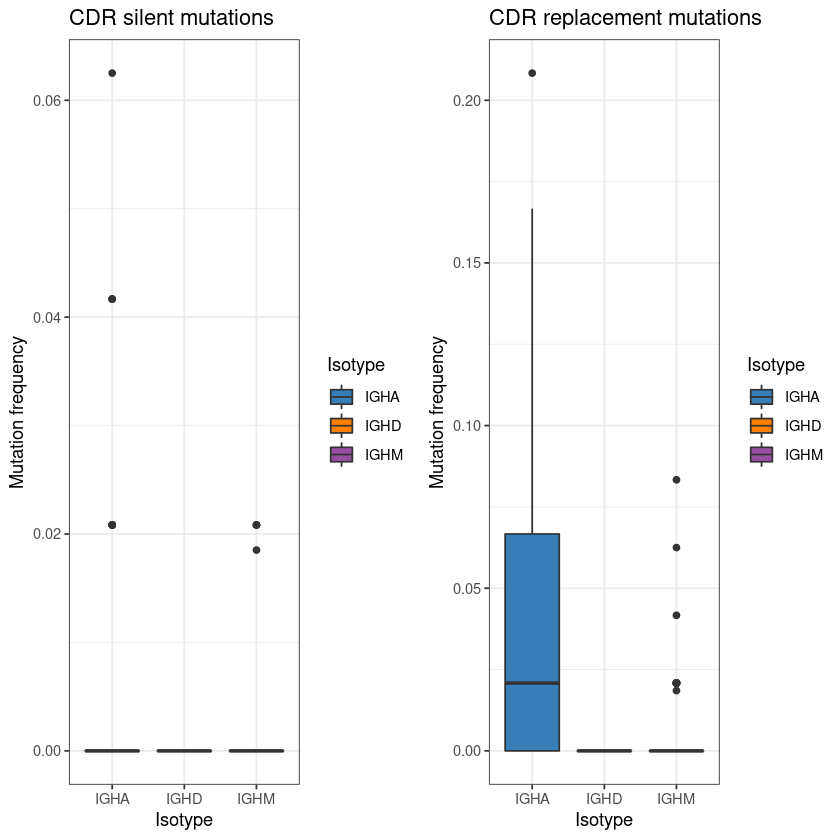

In [11]:
g2 <- ggplot(db_obs_v, aes(x=c_call, y=mu_freq_cdr_s, fill=c_call)) +
    theme_bw() + ggtitle("CDR silent mutations") +
    xlab("Isotype") + ylab("Mutation frequency") +
    scale_fill_manual(name="Isotype", values=IG_COLORS) +
    geom_boxplot()
g3 <- ggplot(db_obs_v, aes(x=c_call, y=mu_freq_cdr_r, fill=c_call)) +
    theme_bw() + ggtitle("CDR replacement mutations") +
    xlab("Isotype") + ylab("Mutation frequency") +
    scale_fill_manual(name="Isotype", values=IG_COLORS) +
    geom_boxplot()
alakazam::gridPlot(g2, g3, ncol=2)

In [12]:
# Calculate charge mutation frequency for the full sequence
db_obs_ch <- observedMutations(db, sequenceColumn="sequence_alignment",
                               germlineColumn="germline_alignment_d_mask",
                               regionDefinition=NULL,
                               mutationDefinition=CHARGE_MUTATIONS,
                               frequency=TRUE, 
                               nproc=1)
# Show new charge mutation frequency columns
db_obs_ch %>% 
    select(sequence_id, starts_with("mu_freq_")) %>%
    head(n=4)

,sequence_id,mu_freq_seq_r,mu_freq_seq_s
,<chr>,<dbl>,<dbl>
1,ACGATACTCAACGCTA-1_contig_2,0,0
2,TGGCCAGTCTCTTATG-1_contig_1,0,0
3,ATAAGAGCAAGAAAGG-1_contig_2,0,0
4,TTCTACAAGAATTCCC-1_contig_1,0,0


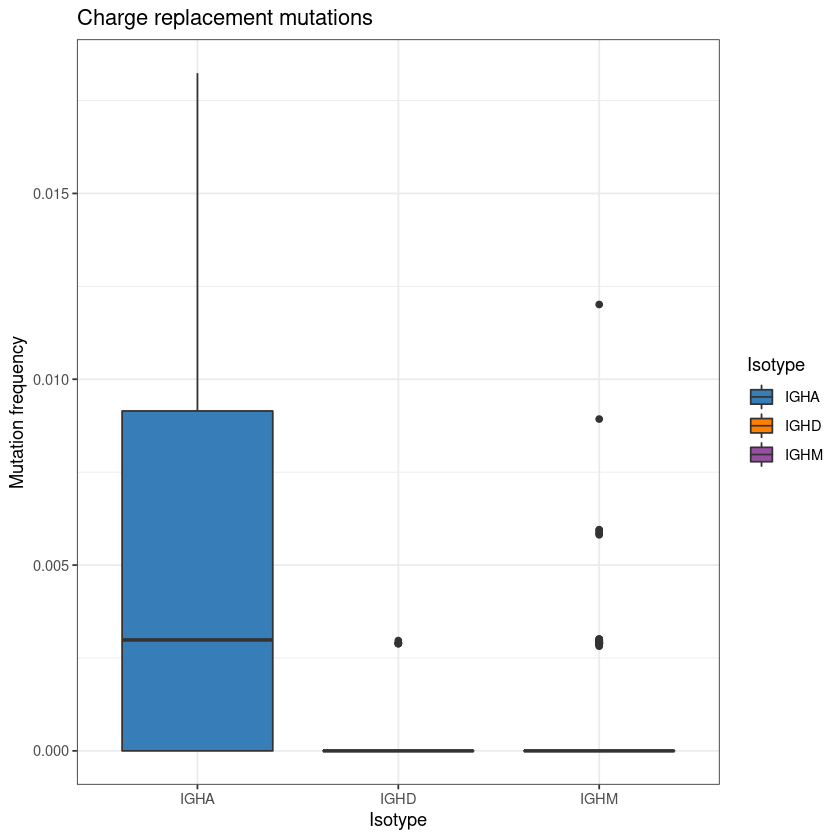

In [13]:
g4 <- ggplot(db_obs_ch, aes(x=c_call, y=mu_freq_seq_r, fill=c_call)) +
    theme_bw() + ggtitle("Charge replacement mutations") +
    xlab("Isotype") + ylab("Mutation frequency") +
    scale_fill_manual(name="Isotype", values=IG_COLORS) +
    geom_boxplot()
plot(g4)